<a href="https://colab.research.google.com/github/Neo-glitch/computer-vision-masterclass/blob/main/Face_Recognition_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Using LBPH(Local Binary Patterns Histograms)

* Dataset used is the Yale Face Dataset

In [ ]:
# mount gDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
import zipfile  # needed for working with compressed files

In [ ]:
path = "/content/drive/MyDrive/Computer Vision Masterclass Files/Datasets/yalefaces.zip"

zip_object = zipfile.ZipFile(file = path, mode = "r")

zip_object.extractall("./") # extract in current dir
zip_object.close()

* Preprocessing Image

In [ ]:
import os

# get files inside path
print(os.listdir("/content/yalefaces/train"))

['subject07.rightlight.gif', 'subject02.happy.gif', 'subject09.glasses.gif', 'subject07.normal.gif', 'subject05.sad.gif', 'subject05.glasses.gif', 'subject05.leftlight.gif', 'subject03.surprised.gif', 'subject12.surprised.gif', 'subject11.rightlight.gif', 'subject06.sad.gif', 'subject01.sad.gif', 'subject06.surprised.gif', 'subject04.normal.gif', 'subject08.sleepy.gif', 'subject09.sleepy.gif', 'subject03.rightlight.gif', 'subject07.noglasses.gif', 'subject05.wink.gif', 'subject08.noglasses.gif', 'subject05.centerlight.gif', 'subject11.wink.gif', 'subject11.sad.gif', 'subject09.surprised.gif', 'subject04.centerlight.gif', 'subject07.centerlight.gif', 'subject12.leftlight.gif', 'subject06.rightlight.gif', 'subject07.sad.gif', 'subject06.normal.gif', 'subject01.glasses.gif', 'subject06.wink.gif', 'subject05.noglasses.gif', 'subject15.leftlight.gif', 'subject10.glasses.gif', 'subject08.wink.gif', 'subject08.glasses.gif', 'subject13.normal.gif', 'subject01.rightlight.gif', 'subject10.surpri

In [ ]:
def get_image_data():
  """
  read each yale faces .gif data and reformat them
  to needed format needed by OpenCV
  """

  # contains each path of the gif image
  paths = [os.path.join("/content/yalefaces/train", f) for f in os.listdir("/content/yalefaces/train")]
  faces = []  # store pixel value of each image
  ids = []    # store the class of people to recognize from 0 - 15

  for path in paths:
    # 'L' means converts colored image to grayscale after opening
    image = Image.open(path).convert("L")
    image_np = np.array(image, np.uint8)

    # get Id(class) of each image
    id = int(os.path.split(path)[1].split(".")[0].split("t")[1])

    ids.append(id)
    faces.append(image_np)
    
  return np.array(ids), faces


In [ ]:
ids, faces = get_image_data()

In [ ]:
ids

array([ 7,  2,  9,  7,  5,  5,  5,  3, 12, 11,  6,  1,  6,  4,  8,  9,  3,
        7,  5,  8,  5, 11, 11,  9,  4,  7, 12,  6,  7,  6,  1,  6,  5, 15,
       10,  8,  8, 13,  1, 10,  9,  8, 12, 10,  5,  4,  8, 15,  6, 15, 11,
        9,  9, 14, 14,  8, 14, 13,  4, 14, 12,  6, 15,  2,  3, 10,  6, 10,
       11, 12, 11,  6, 15,  1,  4,  3,  9,  2,  7, 13,  2, 13,  4, 12,  3,
        1, 13, 12, 11,  5,  4,  3, 11,  2, 10, 15, 13, 13, 12,  8, 13, 11,
        9,  1,  3,  2, 15,  3, 10, 10, 10, 14,  2,  7, 15, 14,  3,  8,  1,
        9, 13,  2, 14,  1,  4, 12,  7, 15, 14,  1, 14,  2,  7,  5,  4])

In [ ]:
len(ids), len(faces)

(135, 135)

* Training LPBH clf

In [ ]:
# default value for neigbhours that's small box matrix is 3 x 3 having a number in middle and neighbors as 8
# and higher means more computational cost
# grid x and grid y is number of grid for image
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()

lbph_classifier.train(faces, ids)  # this trains in kinda like x(face), y(id)

lbph_classifier.write("lbph_classifier.yml")  # save clf

* Recognise faces

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()

lbph_face_classifier.read("/content/lbph_classifier.yml")

In [ ]:
test_image_path = "/content/yalefaces/test/subject12.rightlight.gif"

In [ ]:
# helper to get test image in needed format
image = Image.open(test_image_path).convert("L")
image_np = np.array(image, np.uint8)


In [ ]:
predictions = lbph_face_classifier.predict(image_np)

In [ ]:
expected_output = int(os.path.split(test_image_path)[1].split(".")[0].split("t")[1])

print(f"The model predicted class: {predictions[0]} and expected class is: {expected_output}")
print(f"The model confidence in prediction is {predictions[1]}")

The model predicted class: 12 and expected class is: 12
The model confidence in prediction is 47.57150329610082


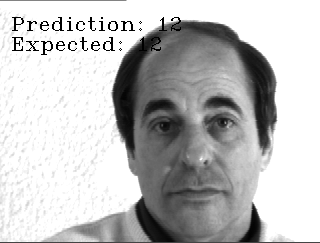

In [ ]:
cv2.putText(image_np, "Prediction: " + str(predictions[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1,(0, 255, 0))
cv2.putText(image_np, "Expected: " + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))

cv2_imshow(image_np)

* Eval Classifier

In [ ]:
paths = [os.path.join("/content/yalefaces/train", f) for f in os.listdir("/content/yalefaces/train")]
predictions = []
expected_outputs = []

for path in paths:
  image = Image.open(path).convert("L")
  image_np = np.array(image, np.uint8)

  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = expected_output = int(os.path.split(path)[1].split(".")[0].split("t")[1])

  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [ ]:
predictions = np.array(predictions)
expected_output = np.array(expected_outputs)

In [ ]:
import pandas as pd


predictions_df = pd.Series(predictions).to_frame("Predictions")
expected_output_df = pd.Series(predictions).to_frame( "Expected")

df = pd.concat([predictions_df, expected_output_df], axis = 1)
df.head(15)

,Predictions,Expected
0,7,7
1,2,2
2,9,9
3,7,7
4,5,5
5,5,5
6,5,5
7,3,3
8,12,12
9,11,11


accuracy is : 1.0



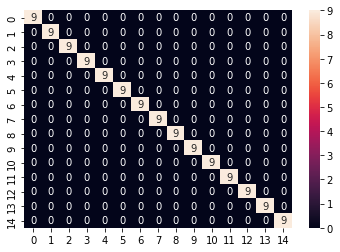

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

print(f"accuracy is : {accuracy_score(expected_outputs, predictions)}\n")

sns.heatmap(confusion_matrix(expected_outputs, predictions), annot = True);


### Using Dlib

In [ ]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

* Detecting Facial Landmarks

In [ ]:
# detect facial points
face_detector = dlib.get_frontal_face_detector()

# gets facial landmarks / point of a face(using the shape predictor landmarks)
# if using this for mobile app, we can use a shape_predictor of maybe just 10 points for computation to be faster
points_detector = dlib.shape_predictor("/content/drive/MyDrive/Computer Vision Masterclass Files/Weights/shape_predictor_68_face_landmarks.dat")

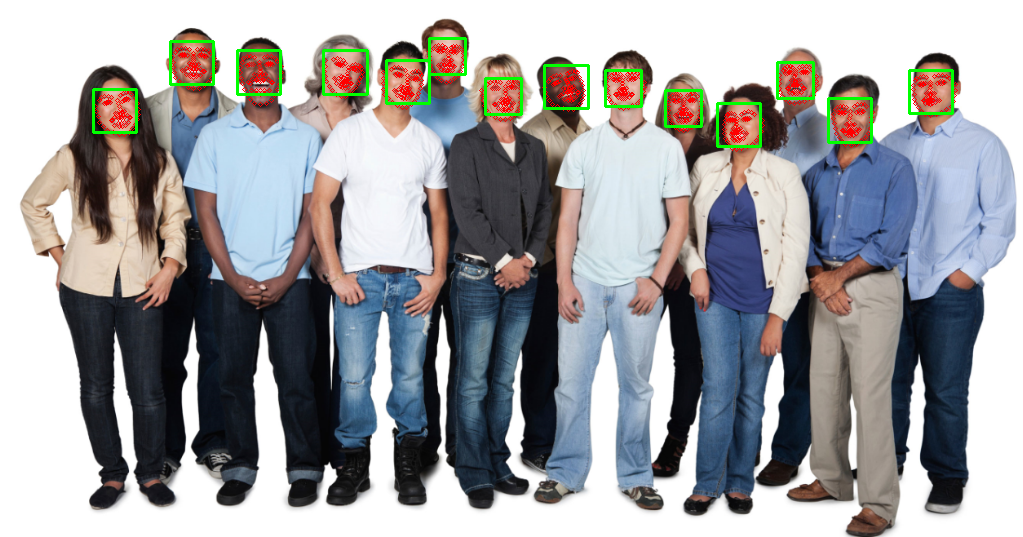

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Computer Vision Masterclass Files/Images/people2.jpg")

# detect the face
face_detections = face_detector(image, 1)

for face in face_detections:

  # facial landamark of each face
  points = points_detector(image, face)
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 2, (0, 0, 255), 1)

  l, b, r, t = face.left(), face.bottom(), face.right(), face.top()
  cv2.rectangle(image, (l, b), (r, t), (0, 255), 2)

cv2_imshow(image)


* Detecting Facial Descriptors(main stuff)


In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("/content/drive/MyDrive/Computer Vision Masterclass Files/Weights/shape_predictor_68_face_landmarks.dat")

# connect to GPU to use this
# Resnet(is surely a bad ass at image clf and recognition...super cool)
face_descriptor_extractor = dlib.face_recognition_model_v1("/content/drive/MyDrive/Computer Vision Masterclass Files/Weights/dlib_face_recognition_resnet_model_v1.dat")


In [ ]:
index = {}  # index of image: path_to_image
idx = 0  # index of image
face_descriptors = None  # to store total face descriptors

paths = [os.path.join("/content/yalefaces/train", f) for f in os.listdir("/content/yalefaces/train")]
for path in paths:
  # print(path)

  # get image of one face in needed format for OpenCv in RGB
  image = Image.open(path).convert("RGB")
  image_np = np.array(image, np.uint8)
  face_detection = face_detector(image_np, 1)

  for face in face_detection:
    l, b, r, t = face.left(), face.bottom(), face.right(), face.top()
    cv2.rectangle(image_np, (l, b), (r, t), (0, 255, 0), 2)

    points = points_detector(image_np, face) # gets 68 points for face image
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 2, (0, 0, 255), 1)

    # descriptors are values computed by nn that rep features of each image
    # in recognizing image, these is what is being matched to give a match
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = np.array([f for f in face_descriptor], np.float64).reshape(1, 128)  # reformat to form understood by opencv

    # print(face_descriptor.shape)

    if face_descriptors is None: 
      # no previously stored descriptors
      face_descriptors = face_descriptor
    else:
      # since previous descritor stuck add this to another row
      face_descriptors = np.vstack(((face_descriptors, face_descriptor)))

    index[idx] = path
    idx += 1

  # cv2_imshow(image_np)


In [ ]:
face_descriptors.shape

(132, 128)

* Calculating Distance btw faces

In [ ]:
# get diff between face descriptors passed
# value close to 0.0 means perfect match and 1.0 means totally opposite
np.linalg.norm(face_descriptors[123]- face_descriptors[118])

0.6458994407185834

In [ ]:
# compare face_detector[131] against all face_detectors row by row
np.linalg.norm(face_descriptors[123] - face_descriptors, axis = 1)

array([0.95204916, 0.69015086, 0.56873568, 0.82501612, 0.56794279,
       0.52732974, 0.62604256, 0.66864836, 0.34860009, 0.82912208,
       0.75507909, 0.85068873, 0.90004618, 0.8013361 , 0.64117904,
       0.72632486, 0.82501612, 0.59264863, 0.85435358, 0.5999024 ,
       0.75860602, 0.76420505, 0.63018139, 0.90366829, 0.89104536,
       0.45344295, 0.90732008, 0.83800271, 0.86561298, 0.66879842,
       0.87768849, 0.5580958 , 0.74082033, 0.79875544, 0.79159308,
       0.79042472, 0.64796214, 0.78195001, 0.6375182 , 0.82780016,
       0.37443088, 0.80975183, 0.66494081, 0.91307764, 0.81721286,
       0.71394802, 0.8316106 , 0.74844236, 0.8200245 , 0.66058196,
       0.67352998, 0.88418991, 0.88632071, 0.76194442, 0.88059553,
       0.66919823, 0.8436844 , 0.85870978, 0.42330426, 0.86764223,
       0.72260379, 0.66110017, 0.70977249, 0.80166128, 0.86561298,
       0.80863806, 0.77836891, 0.53292509, 0.76780735, 0.87203833,
       0.69072567, 0.79229991, 0.89413058, 0.70332348, 0.66058

In [ ]:
lowest_index = np.argmin(np.linalg.norm(face_descriptors[123] - face_descriptors, axis = 1))   # ret index of lowest value or difference

np.linalg.norm(face_descriptors[123] - face_descriptors, axis = 1)[lowest_index]   # get diff score

0.0

* Detecting faces using Dlib

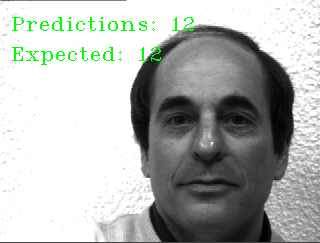

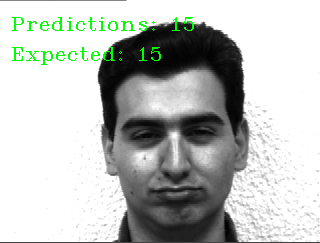

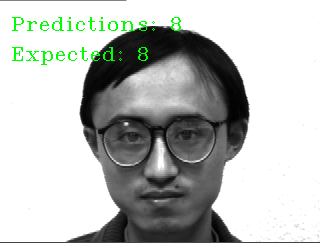

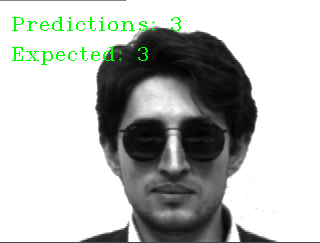

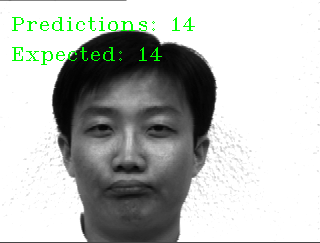

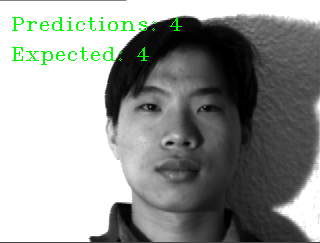

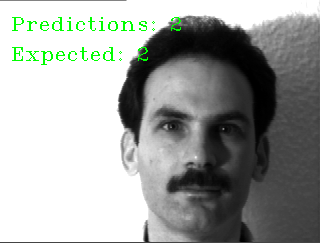

In [ ]:
paths = paths = [os.path.join("/content/yalefaces/test", f) for f in os.listdir("/content/yalefaces/test")]   # gets test images_path
threshold = 0.5 # if dist <= this match found, else no match

predictions = []
expected_outputs = []

for i, path in enumerate(paths):

  image = Image.open(path).convert("RGB")
  image_np = np.array(image, np.uint8)

  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    points = points_detector(image_np, face)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)  # face descriptor of test_image

    face_descriptor = np.array([f for f in face_descriptor], np.float64) \
                        .reshape(1, 128)  # reformat to form understood by opencv

    # calc dist of descriptor btw test image face in focus againt train descriptors array
    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)
    min_index = np.argmin(distances)  # index o face_descriptors with min diff
    min_distance = distances[min_index]

    if(min_distance <= threshold):
      # gets the image match name from the dict having the image idx: image_path_name
      name_pred = int(os.path.split(index[min_index])[1].split(".")[0].split("t")[1])
    else:
      name_pred = -1  # name not Identified

    name_real = int(os.path.split(path)[1].split(".")[0].split("t")[1])

    predictions.append(name_pred)
    expected_outputs.append(name_real)

    # single line python if(seems cool)
    prediction_formatted = str(name_pred) if name_pred != -1 else "Not Identified"


    cv2.putText(image_np, f"Predictions: {prediction_formatted}", (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255, 0))
    cv2.putText(image_np, f"Expected: {str(name_real)}", (10, 60), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255, 0))

  if(i < 7): cv2_imshow(image_np)


predictions = np.array(predictions)
expected_outputs= np.array(expected_outputs)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(expected_outputs, predictions)

1.0

### HomeWork : Facial Recog on Jones_Gabriel Data

In [1]:
# mount gDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import cv2
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
import os
import zipfile  # needed for working with compressed files

In [6]:
path = "/content/drive/MyDrive/Computer Vision Masterclass Files/Datasets/jones_gabriel.zip"

zip_object = zipfile.ZipFile(file = path, mode = "r")

zip_object.extractall("./") # extract in current dir
zip_object.close()

* Preprocessing Image

In [14]:
def get_image_data():
  """
  read each gabriel faces data and reformat them
  to needed format needed by OpenCV
  """

  # contains each path of the gif image
  paths = [os.path.join("/content/jones_gabriel", f) for f in os.listdir("/content/jones_gabriel")]
  faces = []  # store pixel value of each image
  ids = []    # store the class of people to recognize from 0 - 15

  for path in paths:
    # 'L' means converts colored image to grayscale after opening
    image = Image.open(path).convert("L")
    image_np = np.array(image, np.uint8)

    # get Id(class) of each image
    id = int(os.path.split(path)[1].split(".")[1])

    ids.append(id)
    faces.append(image_np)
    
  return np.array(ids), faces


In [15]:
ids, faces = get_image_data()

In [16]:
ids

array([1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1])

In [17]:
len(ids), len(faces)

(50, 50)

* Training LPBH clf

In [18]:
# default value for neigbhours that's small box matrix is 3 x 3 having a number in middle and neighbors as 8
# and higher means more computational cost
# grid x and grid y is number of grid for image
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()

lbph_classifier.train(faces, ids)  # this trains in kinda like x(face), y(id)

lbph_classifier.write("lbph_classifier.yml")  # save clf

* Load previously saved classifier

In [19]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()

lbph_face_classifier.read("/content/lbph_classifier.yml")

* Eval Classifier

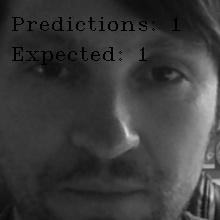

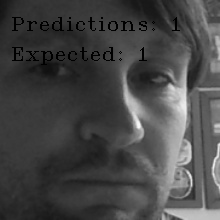

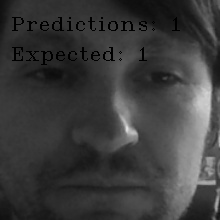

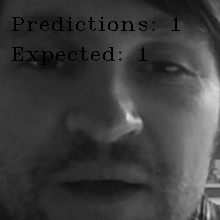

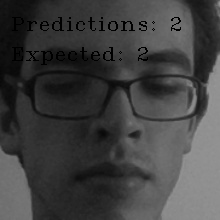

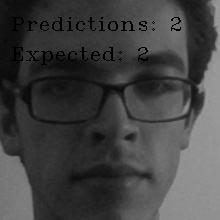

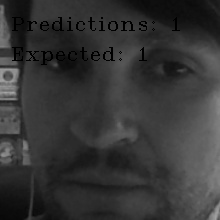

In [33]:
paths = [os.path.join("/content/jones_gabriel", f) for f in os.listdir("/content/jones_gabriel")]
predictions = []
expected_outputs = []

for i, path in enumerate(paths):
  image = Image.open(path).convert("L")
  image_np = np.array(image, np.uint8)

  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = expected_output = int(path.split(".")[1])

  predictions.append(prediction)
  expected_outputs.append(expected_output)

  cv2.putText(image_np, f"Predictions: {prediction}", (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255, 0))
  cv2.putText(image_np, f"Expected: {str(expected_output)}", (10, 60), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255, 0))

  if(i < 7): cv2_imshow(image_np)


In [34]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [35]:
import pandas as pd


predictions_df = pd.Series(predictions).to_frame("Predictions")
expected_output_df = pd.Series(predictions).to_frame( "Expected")

df = pd.concat([predictions_df, expected_output_df], axis = 1)
df.head(15)

,Predictions,Expected
0,1,1
1,1,1
2,1,1
3,1,1
4,2,2
5,2,2
6,1,1
7,1,1
8,1,1
9,2,2


accuracy is : 1.0



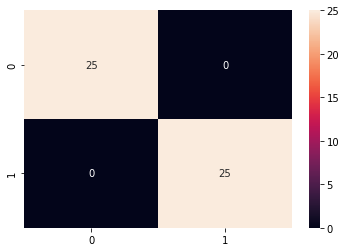

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

print(f"accuracy is : {accuracy_score(expected_outputs, predictions)}\n")

sns.heatmap(confusion_matrix(expected_outputs, predictions), annot = True);


### Using Dlib(Todo: Change Code below to match homework scenario)

In [ ]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

* Detecting Facial Landmarks

In [ ]:
# detect facial points
face_detector = dlib.get_frontal_face_detector()

# gets facial landmarks / point of a face(using the shape predictor landmarks)
# if using this for mobile app, we can use a shape_predictor of maybe just 10 points for computation to be faster
points_detector = dlib.shape_predictor("/content/drive/MyDrive/Computer Vision Masterclass Files/Weights/shape_predictor_68_face_landmarks.dat")

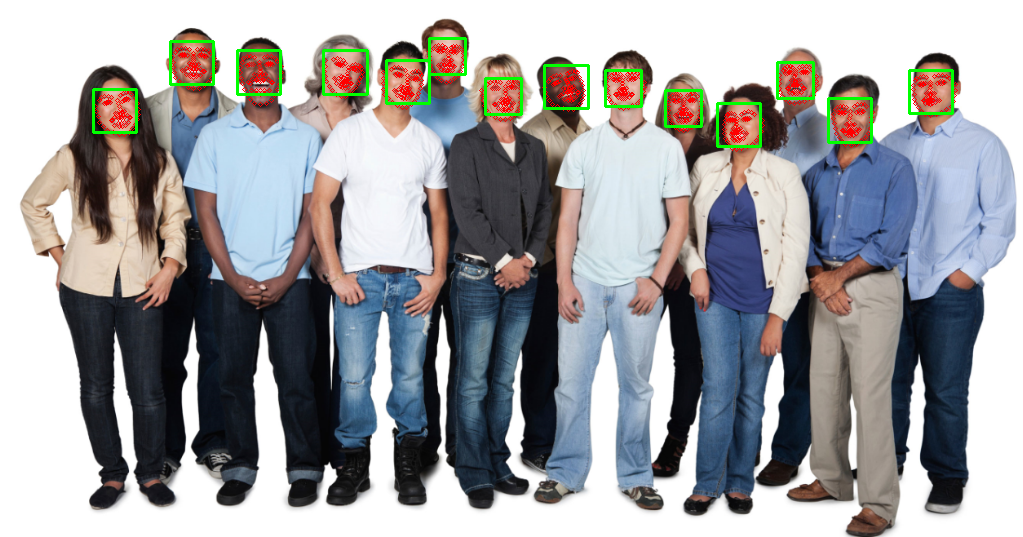

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Computer Vision Masterclass Files/Images/people2.jpg")

# detect the face
face_detections = face_detector(image, 1)

for face in face_detections:

  # facial landamark of each face
  points = points_detector(image, face)
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 2, (0, 0, 255), 1)

  l, b, r, t = face.left(), face.bottom(), face.right(), face.top()
  cv2.rectangle(image, (l, b), (r, t), (0, 255), 2)

cv2_imshow(image)


* Detecting Facial Descriptors(main stuff)


In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("/content/drive/MyDrive/Computer Vision Masterclass Files/Weights/shape_predictor_68_face_landmarks.dat")

# connect to GPU to use this
# Resnet(is surely a bad ass at image clf and recognition...super cool)
face_descriptor_extractor = dlib.face_recognition_model_v1("/content/drive/MyDrive/Computer Vision Masterclass Files/Weights/dlib_face_recognition_resnet_model_v1.dat")


In [ ]:
index = {}  # index of image: path_to_image
idx = 0  # index of image
face_descriptors = None  # to store total face descriptors

paths = [os.path.join("/content/yalefaces/train", f) for f in os.listdir("/content/yalefaces/train")]
for path in paths:
  # print(path)

  # get image of one face in needed format for OpenCv in RGB
  image = Image.open(path).convert("RGB")
  image_np = np.array(image, np.uint8)
  face_detection = face_detector(image_np, 1)

  for face in face_detection:
    l, b, r, t = face.left(), face.bottom(), face.right(), face.top()
    cv2.rectangle(image_np, (l, b), (r, t), (0, 255, 0), 2)

    points = points_detector(image_np, face) # gets 68 points for face image
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 2, (0, 0, 255), 1)

    # descriptors are values computed by nn that rep features of each image
    # in recognizing image, these is what is being matched to give a match
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = np.array([f for f in face_descriptor], np.float64).reshape(1, 128)  # reformat to form understood by opencv

    # print(face_descriptor.shape)

    if face_descriptors is None: 
      # no previously stored descriptors
      face_descriptors = face_descriptor
    else:
      # since previous descritor stuck add this to another row
      face_descriptors = np.vstack(((face_descriptors, face_descriptor)))

    index[idx] = path
    idx += 1

  # cv2_imshow(image_np)


In [ ]:
face_descriptors.shape

(132, 128)

* Calculating Distance btw faces

In [ ]:
# get diff between face descriptors passed
# value close to 0.0 means perfect match and 1.0 means totally opposite
np.linalg.norm(face_descriptors[123]- face_descriptors[118])

0.6458994407185834

In [ ]:
# compare face_detector[131] against all face_detectors row by row
np.linalg.norm(face_descriptors[123] - face_descriptors, axis = 1)

array([0.95204916, 0.69015086, 0.56873568, 0.82501612, 0.56794279,
       0.52732974, 0.62604256, 0.66864836, 0.34860009, 0.82912208,
       0.75507909, 0.85068873, 0.90004618, 0.8013361 , 0.64117904,
       0.72632486, 0.82501612, 0.59264863, 0.85435358, 0.5999024 ,
       0.75860602, 0.76420505, 0.63018139, 0.90366829, 0.89104536,
       0.45344295, 0.90732008, 0.83800271, 0.86561298, 0.66879842,
       0.87768849, 0.5580958 , 0.74082033, 0.79875544, 0.79159308,
       0.79042472, 0.64796214, 0.78195001, 0.6375182 , 0.82780016,
       0.37443088, 0.80975183, 0.66494081, 0.91307764, 0.81721286,
       0.71394802, 0.8316106 , 0.74844236, 0.8200245 , 0.66058196,
       0.67352998, 0.88418991, 0.88632071, 0.76194442, 0.88059553,
       0.66919823, 0.8436844 , 0.85870978, 0.42330426, 0.86764223,
       0.72260379, 0.66110017, 0.70977249, 0.80166128, 0.86561298,
       0.80863806, 0.77836891, 0.53292509, 0.76780735, 0.87203833,
       0.69072567, 0.79229991, 0.89413058, 0.70332348, 0.66058

In [ ]:
lowest_index = np.argmin(np.linalg.norm(face_descriptors[123] - face_descriptors, axis = 1))   # ret index of lowest value or difference

np.linalg.norm(face_descriptors[123] - face_descriptors, axis = 1)[lowest_index]   # get diff score

0.0

* Detecting faces using Dlib

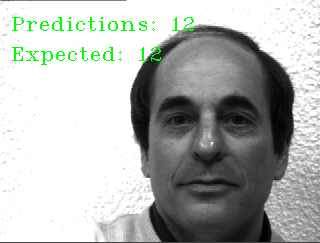

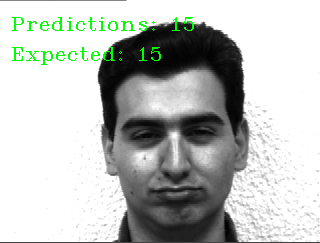

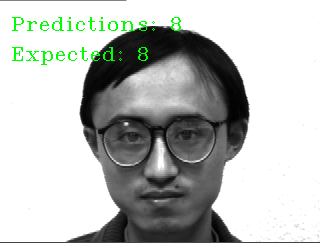

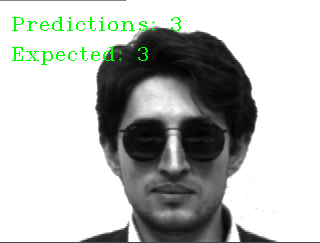

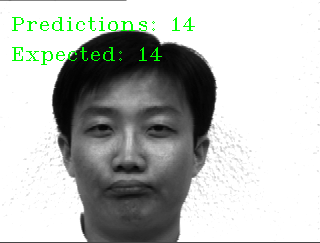

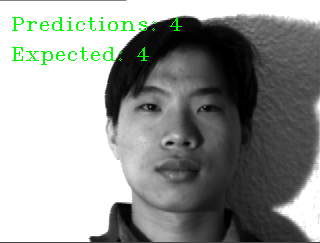

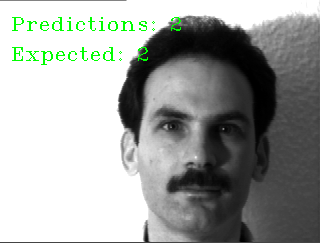

In [ ]:
paths = paths = [os.path.join("/content/yalefaces/test", f) for f in os.listdir("/content/yalefaces/test")]   # gets test images_path
threshold = 0.5 # if dist <= this match found, else no match

predictions = []
expected_outputs = []

for i, path in enumerate(paths):

  image = Image.open(path).convert("RGB")
  image_np = np.array(image, np.uint8)

  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    points = points_detector(image_np, face)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)  # face descriptor of test_image

    face_descriptor = np.array([f for f in face_descriptor], np.float64) \
                        .reshape(1, 128)  # reformat to form understood by opencv

    # calc dist of descriptor btw test image face in focus againt train descriptors array
    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)
    min_index = np.argmin(distances)  # index o face_descriptors with min diff
    min_distance = distances[min_index]

    if(min_distance <= threshold):
      # gets the image match name from the dict having the image idx: image_path_name
      name_pred = int(os.path.split(index[min_index])[1].split(".")[0].split("t")[1])
    else:
      name_pred = -1  # name not Identified

    name_real = int(os.path.split(path)[1].split(".")[0].split("t")[1])

    predictions.append(name_pred)
    expected_outputs.append(name_real)

    # single line python if(seems cool)
    prediction_formatted = str(name_pred) if name_pred != -1 else "Not Identified"


    cv2.putText(image_np, f"Predictions: {prediction_formatted}", (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255, 0))
    cv2.putText(image_np, f"Expected: {str(name_real)}", (10, 60), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255, 0))

  if(i < 7): cv2_imshow(image_np)


predictions = np.array(predictions)
expected_outputs= np.array(expected_outputs)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(expected_outputs, predictions)

1.0

In [2]:
import cv2
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
import zipfile  # needed for working with compressed files